# SUPERVISED LEARNING

The majority of practical machine learning uses supervised learning. <b>Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output</b>.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data. It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process.

Supervised learning problems can be further grouped into regression and classification problems.
* <b>Regression:</b> A regression problem is when the output variable is a real value, such as “dollars” or “weight”.
* <b>Classification:</b> A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.

<b>Overview: Supervised Learning</b>

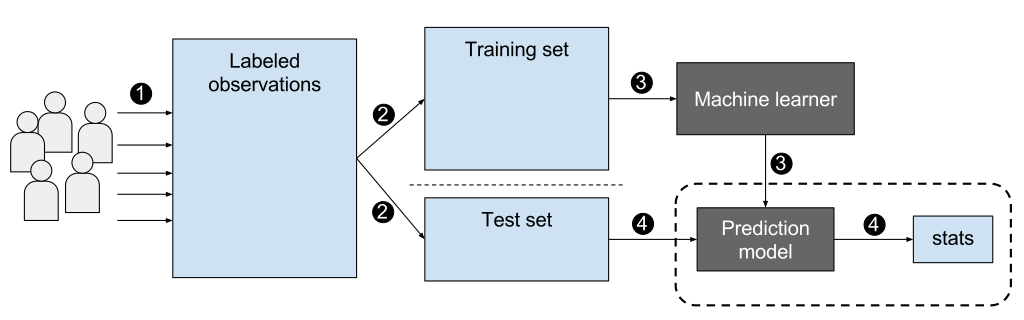

In [2]:
from IPython.display import Image
Image(filename='Supervised_machine_learning.png')

Import Initialize Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# REGRESSION

## Explore Data

In this example, we want to predict the house's price (MEDV) in Boston. The columns descriptions are as below:
* `crim`: per capita crime rate by town.
* `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
* `indus`: proportion of non-retail business acres per town.
* `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* `nox`: nitrogen oxides concentration (parts per 10 million).
* `rm`: average number of rooms per dwelling.
* `age`: proportion of owner-occupied units built prior to 1940.
* `dis`: weighted mean of distances to five Boston employment centres.
* `rad`: index of accessibility to radial highways.
* `tax`: full-value property-tax rate per 10.000 dollars.
* `ptratio`: pupil-teacher ratio by town.
* `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* `lstat`: lower status of the population (percent).
* `medv`: median value of owner-occupied homes in 1000 dollars.

In [2]:
data = pd.read_csv('house.csv')

View first 5 observations

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,3.16360,0.0,18.10,0,0.655,5.759,48.2,3.0665,24,666.0,20.2,334.40,14.13,19.9
1,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307.0,17.4,395.24,21.46,21.7
2,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,17.9,383.37,5.81,25.3
3,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0
4,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,23.9


Show Rows and Columns of data

In [4]:
data.shape

(50600, 14)

Show data type of each column

In [5]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Show summary statistics

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000,50600.000000
mean,3.691749,11.379694,11.196911,0.066640,0.555588,6.287715,68.924281,3.782232,9.588636,409.812194,18.483741,356.246251,12.632483,22.511283
std,8.884094,23.408296,6.888039,0.249401,0.116387,0.699393,28.141136,2.105838,8.722984,168.545652,2.164290,91.813968,7.060987,9.236024
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.130000,0.000000,0.449000,5.887000,45.100000,2.086900,4.000000,281.000000,17.400000,375.330000,6.930000,16.800000
50%,0.263630,0.000000,9.690000,0.000000,0.538000,6.208000,78.300000,3.152300,5.000000,334.000000,19.100000,391.430000,11.410000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.210000,17.090000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Correlation

The term "correlation" refers to a mutual relationship or association between quantities. In almost any business, it is useful to express one quantity in terms of its relationship with others. So, why is correlation a useful metric?
* Correlation can help in predicting one quantity from another
* Correlation can (but often does not) indicate the presence of a causal relationship
* Correlation is used as a basic quantity and foundation for many other modeling techniques
* <b>Note</b>: Pearson Correlation (in the code) calculate relationship/association between numeric variables

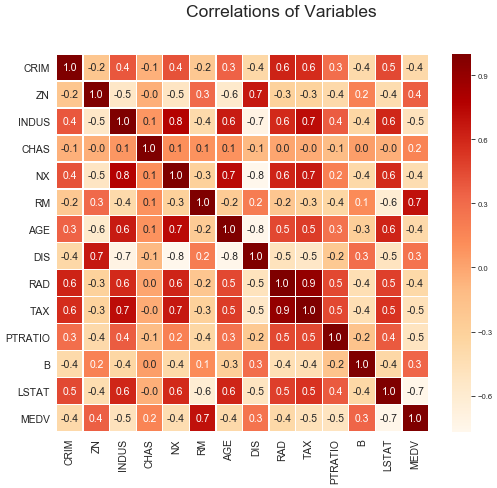

In [7]:
cormat_full = data.fillna(0).corr()

matplotlib.rcParams.update({'font.size': 15})
sns.set()
%matplotlib inline
%config InlineBackend.close_figures=True
a4_dims = (12,10)

fig, ax = plt.subplots(figsize=a4_dims, dpi=50)
fig.suptitle('Correlations of Variables',fontsize=25)
sns.heatmap(cormat_full, ax=ax, annot=True, fmt="0.1f", linewidths=.5, annot_kws={"size":15},cmap="OrRd")
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()
plt.clf();plt.close()

## Split Train and Test

When you’re working on a model and want to train it, you obviously have a dataset. But after training, we have to test the model on some test dataset. For this, you’ll a dataset which is different from the training set you used earlier.<br>

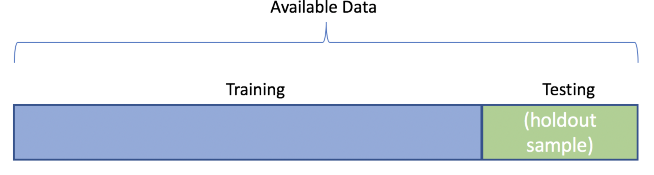

In [3]:
Image(filename='Capture.PNG')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Define Predictors and Target/Label
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1111)

print('X_train Dataset:', X_train.shape[0])
print('X_test Dataset:', X_test.shape[0])

X_train Dataset: 35420
X_test Dataset: 15180


* <b>test_size</b> — This parameter decides the size of the data that has to be split as the test dataset. This is given as a fraction. For example, if you pass 0.5 as the value, the dataset will be split 50% as the test dataset. If you’re specifying this parameter, you can ignore the next parameter.
* <b>train_size</b> — You have to specify this parameter only if you’re not specifying the test_size. This is the same as test_size, but instead you tell the class what percent of the dataset you want to split as the training set.
* <b>random_state</b> — Here you pass an integer, which will act as the seed for the random number generator during the split. Or, you can also pass an instance of the RandomState class, which will become the number generator. If you don’t pass anything, the RandomState instance used by np.random will be used instead.

## Linear Regression

Regression models are used to predict a continuous value. Predicting prices of a house given the features of house like size, price etc is one of the common examples of Regression.

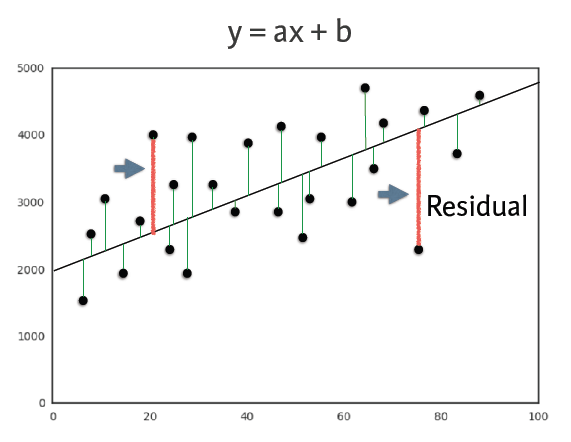

In [4]:
Image(filename='reg.PNG')

<b>Description:</b>
* y = target
* x = single feature
* a, b = parameters of model
* How do we choose a and b? Define an error function for any given line. Choose the line that minimizes the error function

### Model Fitting

Fitting train data to the model

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Showing the intercept and coefficients

In [11]:
from IPython.display import display, Markdown
o = list()
o.append('| MODEL | COEFFICIENTS |\n| --- | --- |')
o.append('| Intercept: | {} |'.format(reg.intercept_))
for p,b in zip(X.columns,list(reg.coef_)):
    o.append('| {} | {} |'.format(p,b))
display(Markdown('\n'.join(o)))

| MODEL | COEFFICIENTS |
| --- | --- |
| Intercept: | 35.505217861116606 |
| CRIM | -0.10458730185336956 |
| ZN | 0.04538340906360305 |
| INDUS | 0.02207957703384066 |
| CHAS | 2.833739479731984 |
| NX | -17.418623691168534 |
| RM | 3.8415792993053204 |
| AGE | 0.0014073261852841504 |
| DIS | -1.4273759791856901 |
| RAD | 0.3017472844120361 |
| TAX | -0.012234150306779927 |
| PTRATIO | -0.9245061867594967 |
| B | 0.009318287846166564 |
| LSTAT | -0.5427894125108197 |

### Model Score

In [12]:
train_reg = round(reg.score(X_train,y_train),4)
test_reg = round(reg.score(X_test,y_test),4)

print('Accuracy Train:',train_reg)
print('Accuracy Test:',test_reg)

Accuracy Train: 0.7423
Accuracy Test: 0.7371


The model suffers overfitting problem. It is the problem where the model accuracy in train dataset is much higher than in the test dataset. If model accuracy in test dataset is much higher than in train test then the model suffers underfitting problem.

### Root Mean Squared Error

In statistics, the root mean squared error (RMSE) or mean squared deviation (RMSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the root average of the squares of the errors—that is, the root average squared difference between the estimated values and what is estimated.

In [13]:
from sklearn.metrics import mean_squared_error as MSE

y_pred = reg.predict(X_test)
RMSE_reg = round(MSE(y_test,y_pred)**0.5,3)
print('Root MSE:', RMSE_reg)

Root MSE: 4.749


### Overfitting and Underfitting

* A model can have <b>overfitting</b> problem if the model accuracy in train dataset is much higher than in the test dataset. Thus, overfitting a regression model reduces its generalizability outside the original dataset. In other words, your model will give inaccurate prediction for the future data.
* If model accuracy in test dataset is much higher than in train test then the model suffers <b>underfitting</b> problem. In this case, your model is bias or can't catch the actual phenomenon in the dataset.

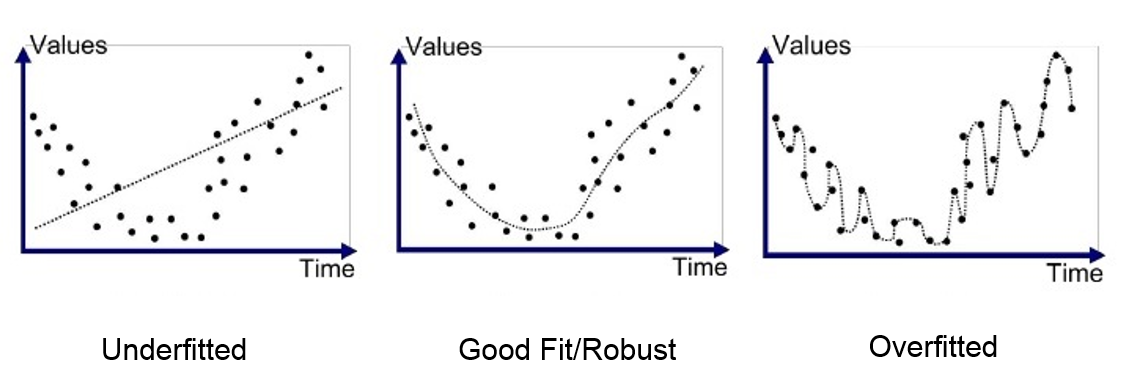

In [5]:
Image(filename='fit.PNG')

### Regularized Regression

* <b>Large coefficients can lead to overfitting</b>
* Penalizing large coefficients: Regularization
* Two famous method: <b>Ridge</b> and <b>Lasso</b>

#### Ridge regression

Alpha: Parameter we need to choose. <b>Alpha controls model complexity.</b>
* Alpha = 0: We get back to linear regression (can lead to overfitting)
* Very high alpha: Can lead to underfitting

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)

print('Accuracy Train:',round(ridge.score(X_train,y_train),4))
print('Accuracy Test:',round(ridge.score(X_test,y_test),4))

Accuracy Train: 0.7398
Accuracy Test: 0.734


<b>Note:</b>Regularization helps reducing overfitting problem caused by large coefficients value. But, please be aware that there are other causes that can lead a model suffers overfitting.

In [15]:
o = list()
o.append('| FINAL MODEL | COEFFICIENTS |\n| --- | --- |')
o.append('| Intercept: | {} |'.format(ridge.intercept_))
for p,b in zip(X.columns,list(ridge.coef_)):
    o.append('| {} | {} |'.format(p,b))
display(Markdown('\n'.join(o)))

| FINAL MODEL | COEFFICIENTS |
| --- | --- |
| Intercept: | 29.8242567256323 |
| CRIM | -0.1010429707190964 |
| ZN | 0.04660796713785126 |
| INDUS | -0.014052131416768102 |
| CHAS | 2.62347531074704 |
| NX | -9.088439606991644 |
| RM | 3.8854161661531874 |
| AGE | -0.005953408137261966 |
| DIS | -1.308373514799973 |
| RAD | 0.2821455054857112 |
| TAX | -0.012868473251807261 |
| PTRATIO | -0.8347341217074912 |
| B | 0.009731093362010246 |
| LSTAT | -0.553252623507324 |

#### Lasso Regression

* Can be used to select important features of a dataset
* Shrinks the coefficients of less important features to exactly 0

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)

print('Accuracy Train:',round(lasso.score(X_train,y_train),4))
print('Accuracy Test:',round(lasso.score(X_test,y_test),4))

Accuracy Train: 0.6844
Accuracy Test: 0.6756


In [17]:
o = list()
o.append('| FINAL MODEL | COEFFICIENTS |\n| --- | --- |')
o.append('| Intercept: | {} |'.format(lasso.intercept_))
for p,b in zip(X.columns,list(lasso.coef_)):
    o.append('| {} | {} |'.format(p,b))
display(Markdown('\n'.join(o)))

| FINAL MODEL | COEFFICIENTS |
| --- | --- |
| Intercept: | 40.722433068710195 |
| CRIM | -0.06478362092934266 |
| ZN | 0.04906017813900513 |
| INDUS | -0.0 |
| CHAS | 0.0 |
| NX | -0.0 |
| RM | 0.9269105517310618 |
| AGE | 0.02136527498509385 |
| DIS | -0.635301437282381 |
| RAD | 0.26240024556579444 |
| TAX | -0.01497582633935925 |
| PTRATIO | -0.6960665471754246 |
| B | 0.008173313617949804 |
| LSTAT | -0.7809288178018271 |

INDUS, CHAS, and NX are less important predictors. Lasso penalize their coefficients to 0 which means those predictors will not be included in the model

## Decision Tree Regressor

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements

A decision tree consists of
* <b>Root</b>: no parent node, question giving rise to two children nodes.
* <b>Internal node</b>: one parent node, question giving rise to two children nodes.
* <b>Leaf</b>: one parent node, no children nodes --> prediction.<br/>

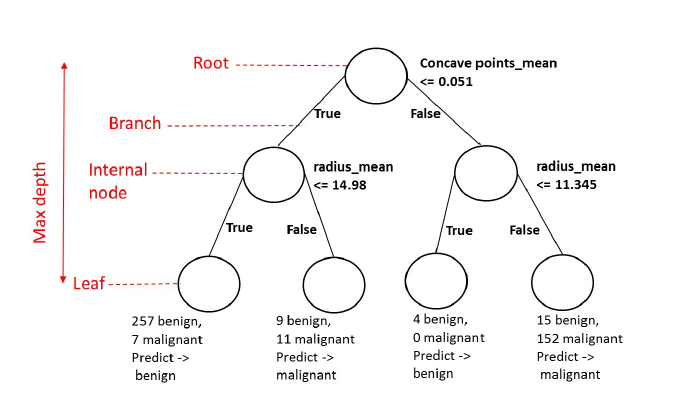

In [6]:
Image(filename='dt.PNG')

### Model Fitting

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3,random_state=1234)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

<b>Main Hyper-Parameter</b>
* max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split : The minimum number of samples required to split an internal node.
* min_samples_leaf : The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

### Model Score

In [19]:
train_dt = round(dt.score(X_train,y_train),4)
test_dt = round(dt.score(X_test,y_test),4)

print('Accuracy Train:',train_dt)
print('Accuracy Test:',test_dt)

Accuracy Train: 0.8203
Accuracy Test: 0.8184


### RMSE

In [20]:
y_pred = dt.predict(X_test)
RMSE_dt = round(MSE(y_test,y_pred)**0.5,3)
print('Root MSE:', RMSE_dt)

Root MSE: 3.947


### Feature Importance

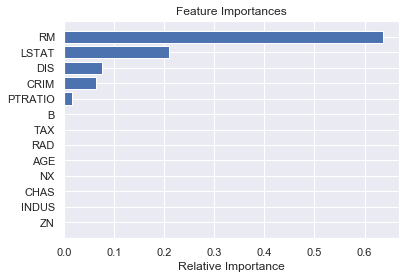

In [21]:
features = X.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Regressor

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement. <br/>

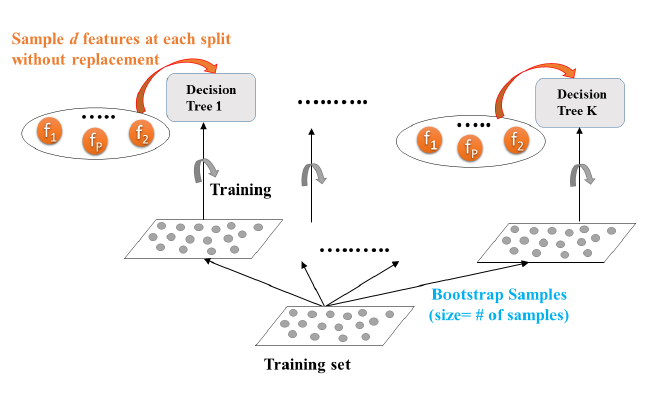

In [7]:
Image(filename='RF.PNG')

### Model Fitting

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=4,max_depth=3,random_state=1234)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

<b>Main Hyper-Parameter</b>
* n_estimators : The number of trees in the forest.
* max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split : The minimum number of samples required to split an internal node:
* min_samples_leaf : The minimum number of samples required to be at a leaf node.

### Model Score

In [23]:
train_rf = round(rf.score(X_train,y_train),4)
test_rf = round(rf.score(X_test,y_test),4)

print('Accuracy Train:',train_rf)
print('Accuracy Test:',test_rf)

Accuracy Train: 0.8275
Accuracy Test: 0.8259


### RMSE

In [24]:
y_pred = rf.predict(X_test)
RMSE_rf= round(MSE(y_test,y_pred)**0.5,3)
print('Root MSE:', RMSE_rf)

Root MSE: 3.864


### Feature Importance

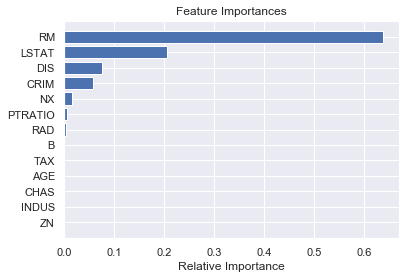

In [25]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## XGBoost Regressor

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient,flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

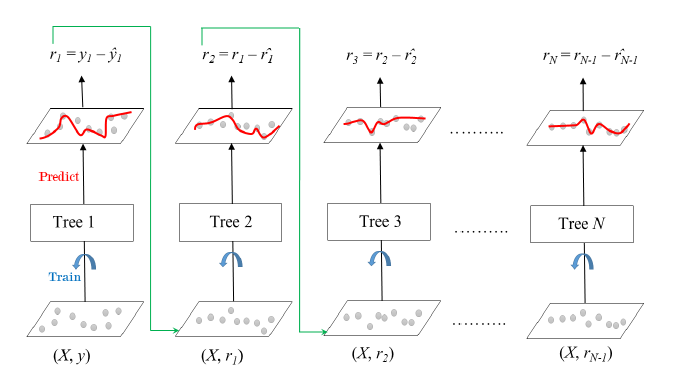

In [8]:
Image(filename='xgb.PNG')

### Model Fitting

In [26]:
from xgboost import XGBRegressor

xgb = XGBRegressor(gamma=1,learning_rate=0.05,random_state=1234)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1234,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

<b>Main Hyper-Parameter</b>:
* max_depth (int) – Maximum tree depth for base learners.
* learning_rate (float) – Boosting learning rate (xgb’s “eta”)
* n_estimators (int) – Number of trees to fit.
* verbosity (int) – The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
* gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
* min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.
* importance_type (string, default "gain") – The feature importance type for the feature_importances_ property: either “gain”, “weight”, “cover”, “total_gain” or “total_cover”.

### Model Score

In [27]:
train_xgb = round(xgb.score(X_train,y_train),4)
test_xgb = round(xgb.score(X_test,y_test),4)

print('Accuracy Train:',train_xgb)
print('Accuracy Test:',test_xgb)

Accuracy Train: 0.9575
Accuracy Test: 0.9565


### RMSE

In [28]:
y_pred = xgb.predict(X_test)
RMSE_xgb = round(MSE(y_test,y_pred)**0.5,3)
print('Root MSE:', RMSE_xgb)

Root MSE: 1.932


### Feature Importance

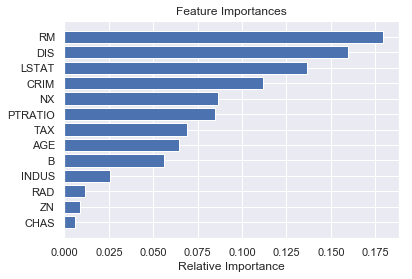

In [29]:
features = X.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Final Model

Choosing the final model for the production is quite tricky. We have to make sure that our model is stable and have good performance on unseen data. We can examine whether our model doesn't suffer from overfitting/underfitting and we have to make sure to tune the model's hyper-parameter. The more detailed explanation of how we validate and select the model will be explained in the next module: Model Validation and Hyper-Parameter Tuning.

In [30]:
perf = pd.DataFrame({'Model':['Regression','Decision Trees','Random Forest', 'XGBoost'],
                     'Acc. Train': [train_reg,train_dt,train_rf,train_xgb],
                     'Acc. Test': [test_reg,test_dt,test_rf,test_xgb],
                     'RMSE':[RMSE_reg,RMSE_dt,RMSE_rf,RMSE_xgb]})
display(perf)

,Model,Acc. Train,Acc. Test,RMSE
0,Regression,0.7423,0.7371,4.749
1,Decision Trees,0.8203,0.8184,3.947
2,Random Forest,0.8275,0.8259,3.864
3,XGBoost,0.9575,0.9565,1.932


In this case, I only care about the accuracy of the model then I choose xgboost since it is stable and has the lowest RMSE.

In [31]:
finalmodel = xgb

## Prediction

Do the prediction using the final model for the new data

In [32]:
newdata = pd.read_csv('newhouse.csv')

In [33]:
newdata['MEDV_Pred'] = finalmodel.predict(newdata)

In [34]:
newdata.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV_Pred
0,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,22.023558
1,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666.0,20.2,393.74,21.78,10.935962
2,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93,21.014698
3,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398.0,18.7,386.96,10.27,21.868017
4,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81,23.355919


# CLASSIFICATION

## Explore Data

In this example, we want to predict the annual income level (less or greater than 50.000 dollars) of US Citizen. The columns descriptions are below:
* age: age of individual
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
* fnlwgt: Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
* education	string: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
* education_num	
* marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
* sex: Female, Male
* capital_gain	
* capital_loss	
* hours_per_week: working hours per week
* native_country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
* income_level: Predictor class if individual earns greater or less than 50000 dollars per year. Values: <=50K, >50K

In [35]:
data = pd.read_csv('income.csv')

View last 5 of observations

In [36]:
data.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,?,321403.0,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
48841,35,Self-emp-inc,182148.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


In [37]:
data.shape

(48842, 15)

In [38]:
data.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income_level       object
dtype: object

In [39]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Preprocessing

We have several categorical variables in the data, we should transform them to numerical since many machine learning algorithms require numerical data to work with. There are several methods to transform categorical variables to numerical, in this module we will use <b>One-Hot Encoding</b> or <b>Dummy Variable</b>. The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.

In [40]:
# Define Predictors and Target/Label
X = data.drop('income_level', axis=1)
# Income_level = 1 means Income >50K
y = np.where(data['income_level'].str.contains('>50K'), 1, 0)

Generating dummy variable for categorical predictors

In [41]:
X = pd.get_dummies(X,drop_first=False)
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516.0,13,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311.0,13,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646.0,9,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721.0,7,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409.0,13,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Train and Test

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1111)

print('X_train Dataset:', X_train.shape[0])
print('X_test Dataset:', X_test.shape[0])

X_train Dataset: 34189
X_test Dataset: 14653


## Logistic Regression

Logistic Regression is a type of classification algorithm. It does not try to predict the value of a numeric variable given a set of inputs but a probability that the given input point belongs to a certain class. The central premise of Logistic Regression e.g. Binary Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a linear (read: straight) boundary.<br/>

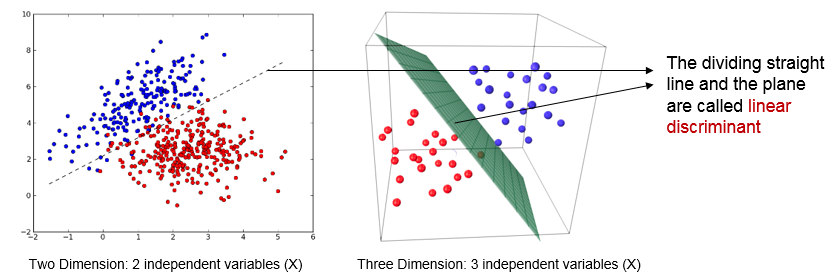

In [11]:
Image(filename='lr.PNG')

### Model Fitting

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1234)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1234, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Model GINI

Accuracy Score is a harsh metric for classification problem, we should find another metrics that can show the actual classification model's performance e.g. AUC and GINI.

In [44]:
train_lr = round(lr.score(X_train,y_train),4)
test_lr = round(lr.score(X_test,y_test),4)

print('Accuracy Train:',train_lr)
print('Accuracy Test:',test_lr)

Accuracy Train: 0.7992
Accuracy Test: 0.7956


In simple terms, model Gini shows the predictive power of the model to differentiate different class of the output. The Gini value is between 0 and 1 (or between 0% and 100%), the predictive power of the model is getting higher when the Gini is getting close to 1 or 100%. 

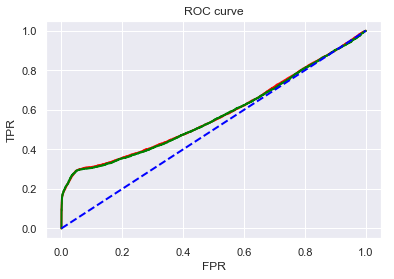

,Dataset,AUC,GINI
0,Train,0.5759,0.1518
1,Test,0.5736,0.1472


In [45]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

# Prediction
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# Area Under Curve (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
roc_auc_train = round(auc(fpr_train, tpr_train),4)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_pred)
roc_auc_test = round(auc(fpr_test, tpr_test),4)

plt.figure()
##Adding the ROC
plt.plot(fpr_train, tpr_train, color='red',lw=2, label='ROC train')
plt.plot(fpr_test, tpr_test, color='green',lw=2, label='ROC test')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

GiniLR_train = round((2*roc_auc_train) - 1,4)
GiniLR_test = round((2*roc_auc_test) - 1,4)

metrics = pd.DataFrame({'Dataset':['Train','Test'],
                     'AUC': [roc_auc_train,roc_auc_test],
                     'GINI': [GiniLR_train,GiniLR_test]})
display(metrics)

## K-Nearest Neighbors (KNN)

* The algorithm finds the most similar observations to the one you have to predict and from which you derive a good intuition of the possible answer by averaging the neighboring values, or by picking the most frequent answer class among them.<br>
* The learning strategy in a kNN is more like memorization. It’s just like remembering what the answer should be when the question has certain characteristics (based on circumstances or past examples) rather than really knowing the answer, because you understand the question by means of specific classification rules. In a sense, kNN is often defined as a lazy algorithm because no real learning is done at the training time, just data recording.<br>

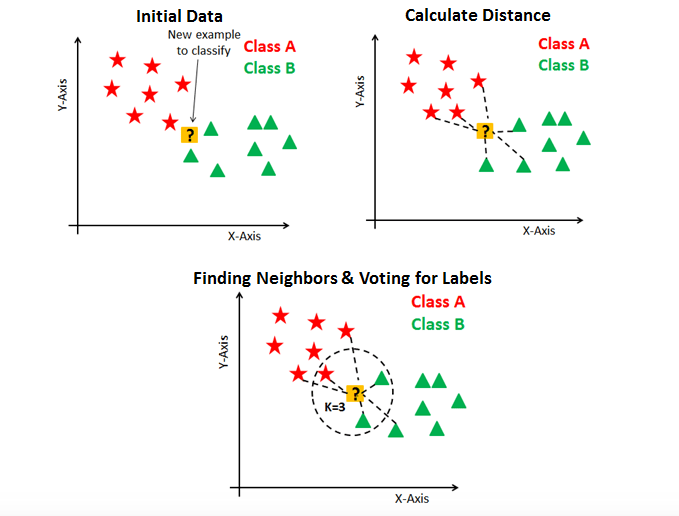

In [12]:
Image(filename='knn.PNG')

### Model Fitting

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

### Model GINI

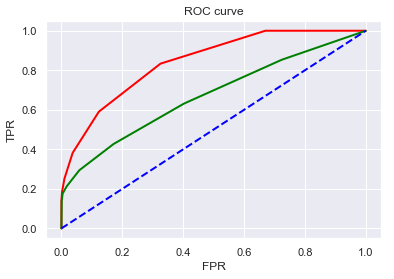

,Dataset,AUC,GINI
0,Train,0.8425,0.685
1,Test,0.6710,0.342


In [47]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

# Prediction
train_pred = knn.predict_proba(X_train)[:,1]
test_pred = knn.predict_proba(X_test)[:,1]

# Area Under Curve (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
roc_auc_train = round(auc(fpr_train, tpr_train),4)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_pred)
roc_auc_test = round(auc(fpr_test, tpr_test),4)

plt.figure()
##Adding the ROC
plt.plot(fpr_train, tpr_train, color='red',lw=2, label='ROC train')
plt.plot(fpr_test, tpr_test, color='green',lw=2, label='ROC test')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

GiniKNN_train = round((2*roc_auc_train) - 1,4)
GiniKNN_test = round((2*roc_auc_test) - 1,4)

metrics = pd.DataFrame({'Dataset':['Train','Test'],
                     'AUC': [roc_auc_train,roc_auc_test],
                     'GINI': [GiniKNN_train,GiniKNN_test]})
display(metrics)

## Random Forest Classifier

### Model Fitting

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=4,max_depth=3,random_state=1234)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

### Model GINI

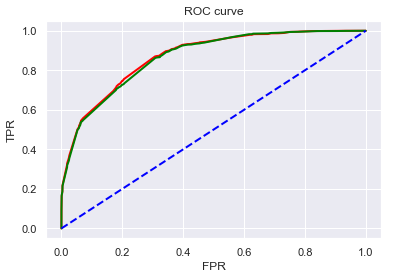

,Dataset,AUC,GINI
0,Train,0.870,0.740
1,Test,0.866,0.732


In [49]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

# Prediction
train_pred = rfc.predict_proba(X_train)[:,1]
test_pred = rfc.predict_proba(X_test)[:,1]

# Area Under Curve (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
roc_auc_train = round(auc(fpr_train, tpr_train),4)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_pred)
roc_auc_test = round(auc(fpr_test, tpr_test),4)

plt.figure()
##Adding the ROC
plt.plot(fpr_train, tpr_train, color='red',lw=2, label='ROC train')
plt.plot(fpr_test, tpr_test, color='green',lw=2, label='ROC test')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

GiniRF_train = round((2*roc_auc_train) - 1,4)
GiniRF_test = round((2*roc_auc_test) - 1,4)

metrics = pd.DataFrame({'Dataset':['Train','Test'],
                     'AUC': [roc_auc_train,roc_auc_test],
                     'GINI': [GiniRF_train,GiniRF_test]})
display(metrics)

### Feature Importance

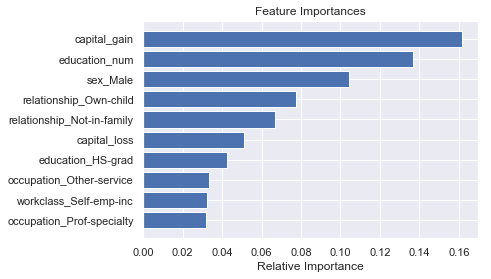

In [50]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[max(indices)-10:max(indices)])), importances[indices[max(indices)-10:max(indices)]], 
         color='b', align='center')
plt.yticks(range(len(indices[max(indices)-10:max(indices)])), [features[i] for i in indices[max(indices)-10:max(indices)]])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
indices[max(indices)-10:max(indices)]

array([48, 11, 46, 26,  4, 54, 56, 65,  2,  3], dtype=int64)

In [52]:
features[2]

'education_num'

## XGBoost Classifier

### Model Fitting

In [53]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(gamma=1,learning_rate=0.05,random_state=1234)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=1234, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

### Model GINI

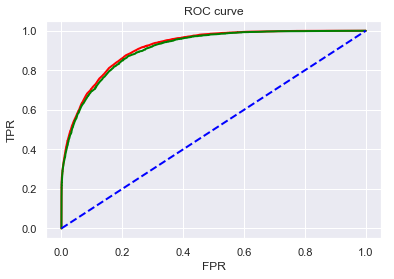

,Dataset,AUC,GINI
0,Train,0.9162,0.8324
1,Test,0.9100,0.8200


In [54]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

# Prediction
train_pred = xgbc.predict_proba(X_train)[:,1]
test_pred = xgbc.predict_proba(X_test)[:,1]

# Area Under Curve (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
roc_auc_train = round(auc(fpr_train, tpr_train),4)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_pred)
roc_auc_test = round(auc(fpr_test, tpr_test),4)

plt.figure()
##Adding the ROC
plt.plot(fpr_train, tpr_train, color='red',lw=2, label='ROC train')
plt.plot(fpr_test, tpr_test, color='green',lw=2, label='ROC test')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

GiniXGB_train = round((2*roc_auc_train) - 1,4)
GiniXGB_test = round((2*roc_auc_test) - 1,4)

metrics = pd.DataFrame({'Dataset':['Train','Test'],
                     'AUC': [roc_auc_train,roc_auc_test],
                     'GINI': [GiniXGB_train,GiniXGB_test]})
display(metrics)

### Feature Importance

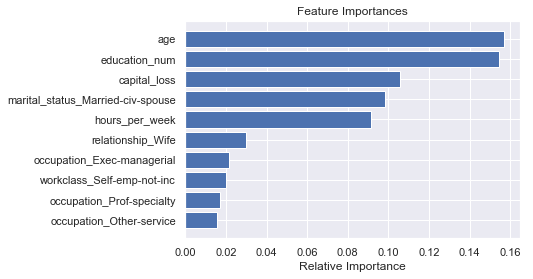

In [55]:
features = X.columns
importances = xgbc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[max(indices)-10:max(indices)])), importances[indices[max(indices)-10:max(indices)]], 
         color='b', align='center')
plt.yticks(range(len(indices[max(indices)-10:max(indices)])), [features[i] for i in indices[max(indices)-10:max(indices)]])
plt.xlabel('Relative Importance')
plt.show()

## Final Model

In [56]:
perf = pd.DataFrame({'Model':['LogReg','KNN','RF', 'XGBoost'],
                     'GINI Train': [GiniLR_train,GiniKNN_train,GiniRF_train,GiniXGB_train],
                     'GINI Test': [GiniLR_test,GiniKNN_test,GiniRF_test,GiniXGB_test]})
display(perf)

,Model,GINI Train,GINI Test
0,LogReg,0.1518,0.1472
1,KNN,0.6850,0.3420
2,RF,0.7400,0.7320
3,XGBoost,0.8324,0.8200


In this case, I only care about the accuracy of the model then I choose xgboost since it is stable and has the highest GINI.

In [57]:
finalmodel = xgbc

## Prediction

In [58]:
newdata = pd.read_csv('newincome.csv')

Income_Pred = 1 means Income >50K

In [59]:
newdata['income_Pred'] = finalmodel.predict(newdata)

In [60]:
newdata.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_Pred
0,52,89054.0,9,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,47,102628.0,14,15024.0,0.0,55.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,38,32528.0,10,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,145178.0,9,0.0,0.0,38.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,29,32897.0,9,0.0,0.0,25.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
